In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ex1data1.csv");

In [3]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Population of City in 10,000s')

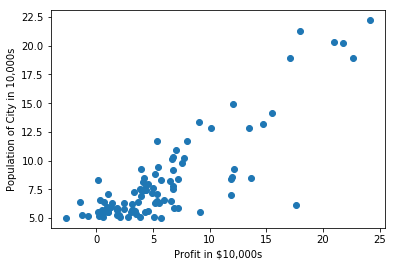

In [4]:
plt.scatter(df["Profit"],df["Population"])
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')

In [5]:
X=np.column_stack((np.ones(df["Population"].size),df["Population"])) #Creating X matrix X=[1,x]; X=population
Y=df["Profit"] # Y=profit

In [6]:
theta=np.zeros(2) # initializing thetas from 0,0

In [7]:
alpha=0.01

In [8]:
m=df["Population"].size

In [9]:
def findJtheta(X,Y,theta):
    t=(np.dot(X,theta)-Y)**2
    return sum(t)/(2*m)

In [10]:
jtheta=findJtheta(X,Y,theta)
thetaTemp=jtheta

In [11]:
while (jtheta<=thetaTemp):
    thetaTemp=findJtheta(X,Y,theta)
    if(thetaTemp>jtheta):
        break
    else:
        jtheta=thetaTemp
    temp0=theta[0]-alpha*(1/m)*(sum((np.dot(X,theta)-Y)))
    temp1=theta[1]-alpha*(1/m)*(sum((np.dot(X,theta)-Y)*df["Population"]))
    theta=np.array([temp0,temp1])

In [12]:
theta

array([-3.89577718,  1.19303327])

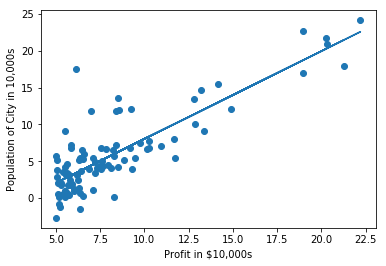

In [13]:
plt.scatter(df["Population"],df["Profit"],label="training data")
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
hyp=theta[0]+df["Population"]*theta[1]
plt.plot(df["Population"],hyp)